Populating the interactive namespace from numpy and matplotlib
(-72.976512, 41.337662) [' Thu, Sept. 18th 2014', 'all-cases-dead-on-arrival', ' 1605 WHALLEY AVE', ' AMITY/POND LILY', ' 01:53 p.m.']
(-72.960621, 41.326316) [' Wed, Sept. 3rd 2014', 'animal-bites', ' 46 FOUNTAIN ST', ' CENTRAL/PHILIP', ' 01:23 p.m.']
(-72.896278, 41.324366) [' Mon, Sept. 8th 2014', 'animal-bites', ' 1 LYMAN ST', ' WELTON/INTERSECTION', ' 02:33 p.m.']
(-72.952039, 41.325584) [' Sat, Sept. 20th 2014', 'animal-bites', ' 15 DIAMOND ST', ' BLAKE/RUBY', ' 03:37 p.m.']
(-72.956456, 41.329289) [' Sat, Sept. 20th 2014', 'animal-bites', ' 26 AUSTIN ST', ' BLAKE/HARD', ' 06:52 p.m.']
The new_haven_merged dataset has a total average nearest neighbor distance of:  0.000240361352928
The new_haven_merged dataset with the mark 'animal-bites' mark has a total average nearest neighbor distance of:  0.0126135423802
The new_haven_merged dataset with the mark 'animal-bites' and 'assault-wdangerous-weapon' marks has a total av

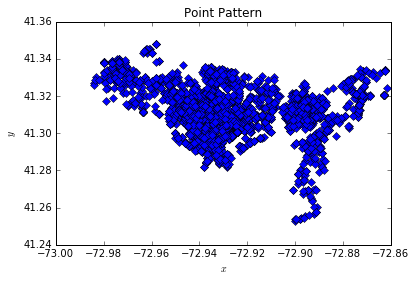

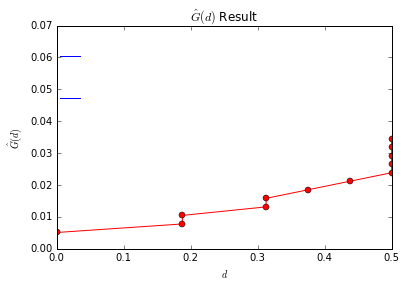

In [4]:
#from . import pointPattern
#from . import point
import pysal as ps
import unittest
from src.point import Point
from src.pointPattern import PointPattern
import matplotlib
import matplotlib.pyplot as pyp
import numpy as np
%pylab inline

#utilize the example shapefile
shapefile = ps.open(ps.examples.get_path('new_haven_merged.shp'))
dbf = ps.open(ps.examples.get_path('new_haven_merged.dbf'))
i = 0
for geometry, attributes in zip(shapefile,dbf):
    if i < 5:
        print(geometry,attributes)
    i = i +1

pointList = []
point_pattern = PointPattern()
for geometry,attributes in zip(shapefile,dbf):
    #create a list of points to then append to a pointPattern:
    point_pattern.add_point(Point(geometry[0],geometry[1],[attributes[0],attributes[1],attributes[2],attributes[3],attributes[4]])) #third parameters is a list of marks

#so now you have the points part of pointPattern, create an instance of pointPattern:

#add points to your self.points:
#for p in pointList:
 #       point_pattern.add_point(p)

#how many points have a nearest neighbor closer than the distance "band" step thing
    #okay, so now you actually have the data inside pointPattern's self.points. Now you can do some analysis:

    #illustrate the use of mean nearest neighbor on the entire dataset:
kd_avg_nn = point_pattern.kDTree_nearest_neighbor()
print("The new_haven_merged dataset has a total average nearest neighbor distance of: ", kd_avg_nn)

#illustrate the use of the mean nearest neighbor on a mark:
kd_avg_nn_mark = point_pattern.kDTree_nearest_neighbor(['animal-bites'])
print("The new_haven_merged dataset with the mark 'animal-bites' mark has a total average nearest neighbor distance of: ", kd_avg_nn_mark)

kd_avg_nn_mark2 = point_pattern.kDTree_nearest_neighbor(['animal-bites','assault-wdangerous-weapon'])
print("The new_haven_merged dataset with the mark 'animal-bites' and 'assault-wdangerous-weapon' marks has a total average nearest neighbor distance of", kd_avg_nn_mark2)


#ssssssillustrate the use of the g function:
np_compute_g, ds1 = point_pattern.numpy_compute_g(12)
print("The new_haven_merged dataset's g function results are:")
for g in np_compute_g:
    print(g)

np_compute_g_mark, ds2  = point_pattern.numpy_compute_g(12,['animal-bites'])
print("The new_haven_merged dataset's g function results with a mark of 'animal-bites' are: ")
for g in np_compute_g_mark:
    print(g)

#find the critical points for the g function:
criticalList = point_pattern.critical_points()

np_compute_g_mark2, ds3 = point_pattern.numpy_compute_g(12,['animal-bites','assault-wdangerous-weapon'])
print("The new_haven_merged dataset's g function results with a marks of 'animal-bites' and 'assault-wdangerous-weapon' are: ")
for g in np_compute_g_mark2:
    print(g)

#now plot the point pattern:
x = []
y = []
#put the points into x and y:
for p in point_pattern.points:
    x.append(p.x)
    y.append(p.y)

fig, ax1 = pyp.subplots()
ax1.plot(np.array(x),np.array(y),color='blue',marker='D',linewidth=0)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_title('Point Pattern')


#now print the results of the g function (with mark animal bites):
#np_compute_g holds the list of the G function for each discrete d.
#ds1 holds the distance bands:
fig2, ax2 = pyp.subplots()
ax2.plot(np.array(np_compute_g_mark),np.array(ds2),'ro-')
ax2.plot((np.amin(ds2),np.amax(ds2)),(criticalList[0],criticalList[0]),color='blue')
ax2.plot((np.amin(ds2),np.amax(ds2)),(criticalList[1],criticalList[1]),color='blue')
ax2.set_xlabel(r'$d$')
ax2.set_ylabel(r'$\hat{G}(d)$')
ax2.set_title(r'$\hat{G}(d)$ Result')